In [2]:
%matplotlib inline

import pipeline as pipe
import data, systematics
view = data.view_frame_image
import reduction as r
import dispersion as disp

import matplotlib.pyplot as p
import os
import numpy as np
from scipy.optimize import curve_fit, leastsq

Start with _ima files in a folder, calibrated images

I then create lists of the exposures, seperated into visits, and calculate the positions of the direct images (for the wavelength calibrations).

Then choose config parameters for the given observations and try a run on a single exposure.

### Generate visit lists
These include the filters, times, and scan direction of each exposure for faster access

In [ ]:
reload(data)
data.make_input_image_lists(None, 
        data_dir='./data/test/', prop_str='iccz')

In [ ]:
data.make_input_image_list('./data/test/')
os.rename('./data/test/visit_22.lis', './data/test/eclipse.lis')

### Create direct image catalogue

In [ ]:
pipe.create_orbit_cats_gauss(target='test', source_dir='./data/', gridsize=30, use_ima=False, nstars=1)

### Generate exposure shifts list

Fit direct image position for wavelength calibration, and find shifts between exposures

In [ ]:
# Slow don't actually run it if you have the file (exposure_shifts.lis)
shifts = pipe.compute_exposure_shifts(['eclipse.lis'], '/home/jacob/hstscan/data/test/', 
                            save_dir='/home/jacob/hstscan/data/test/')

### Configs

Set up config files and log folder

In [ ]:
if not os.path.isdir('./data/test/logs/'): os.mkdir('./data/test/logs/')

In [ ]:
with open('./data/test/red.conf') as g: print(g.read())

In [ ]:
with open('./data/test/ext.conf') as g: print(g.read())

# Data reduction example

In [ ]:
exp = pipe.reduce_exposure( 'iccz22ckq_ima.fits', pdf=False, logger=False,
                              conf_file = './data/test/red.conf')

In [ ]:
exp_spectrum, variance, interp_spectra, variances = \
                    pipe.extract_spectra(exp, conf_file='./data/test/ext.conf',
                                        pdf=False, logger=False)

# Run for all exposures
From the terminal run: "python run_pipeline.py", and it should reduce every exposure in "exposure.lis"

Should take about 15 minutes on 2 cores

This will generate partial exposure_red.fits files and exposure_spec.txt spectra for each exposure

# Look at outputs

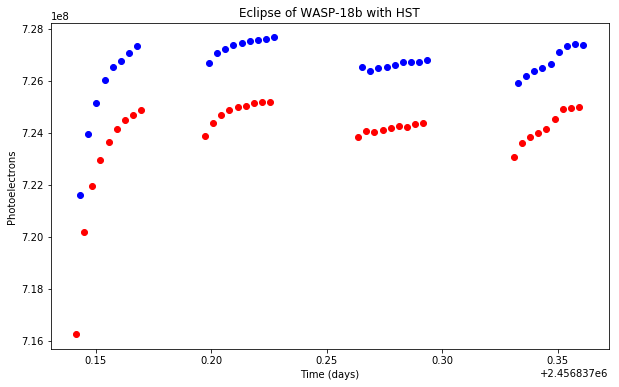

In [4]:
reload(data)
p.figure(figsize=(10,6))
times, fluxes, errs, directions = data.broadband_fluxes(
        files='eclipse.lis', source_dir='./data/test/',
        wmin=1.14,wmax=1.6,
        direction='a', plot=True)
p.xlabel('Time (days)')
p.ylabel('Photoelectrons')
p.title('Eclipse of WASP-18b with HST')
p.show()

# Profile of the pipeline

In [ ]:
%load_ext snakeviz

In [ ]:
%%snakeviz
exp = pipe.reduce_exposure( 'iccz22ckq_ima.fits', conf_file = './data/test/red.conf')
exp_spectrum, variance, interp_spectra, variances = \
                    pipe.extract_spectra(exp, conf_file='./data/test/ext.conf')

Half of the time is spent doing the wavelength calibration. Just changed this so likely can be optimized later.

# To do list
- Error handling
- Neater extraction algorithm
- Fix create_orbit_cats_gauss (not stable)
- Bug genocide
- update exposure_red.fits history